<a href="https://colab.research.google.com/github/madumicheal/image-processing-with-gemini/blob/main/image_processing_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get("GOOGLE_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
!curl -o image.jpg https://peachpuff-lemur-779915.hostingersite.com/wp-content/uploads/2024/09/nigeria-driver-license-YKb0Gk24DGHEG8KD-3.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 31939  100 31939    0     0   119k      0 --:--:-- --:--:-- --:--:--  119k


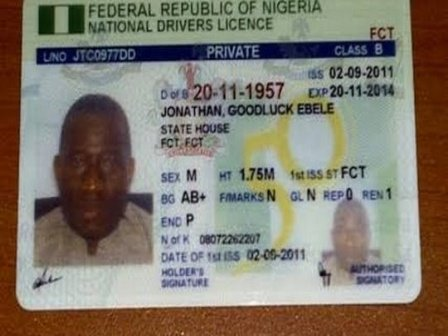

In [ ]:
import PIL.Image

image = PIL.Image.open('image.jpg')
image

In [ ]:
import google.generativeai as genai
import typing_extensions as typing
import json

class DriversInfo(typing.TypedDict):
  first_name:str
  middle_name:str
  last_name:str
  gender:str
  nationality:str
  place_of_birth:str
  DOB:str
  BG:str
  height:str
  issuance_date:str
  expiry_date:str

model = genai.GenerativeModel('gemini-1.5-pro',
                              generation_config={"response_mime_type" : "application/json",
                                                 "response_schema" : list[DriversInfo]})

prompt = "Analyse the image and list out the details from the drivers license"

response = model.generate_content([prompt, image])

print(response.text)

[{"BG": "AB+", "DOB": "20-11-1957", "expiry_date": "20-11-2014", "first_name": "JONATHAN", "gender": "M", "height": "1.75M", "issuance_date": "02-09-2011", "last_name": "EBELE", "middle_name": "GOODLUCK", "nationality": "Nigerian"}]


In [ ]:
for info in json.loads(response.text):
  print(info)

{'BG': 'AB+', 'DOB': '20-11-1957', 'expiry_date': '20-11-2014', 'first_name': 'JONATHAN', 'gender': 'M', 'height': '1.75M', 'issuance_date': '02-09-2011', 'last_name': 'EBELE', 'middle_name': 'GOODLUCK', 'nationality': 'Nigerian'}
